## Importing libiraries

In [2]:
# importing important libiraries for data analysis part
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importig important libiraries for AI
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
# adjusting the settings for showing float numbers and maximum column count
pd.options.display.float_format = '{:20.1f}'.format
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', None)

In [5]:
# reading the Excel file and storing it into variable df
df = pd.read_excel(r'I:\data analysis\python\Understand_Customers_in_Python\online_retail_II.xlsx', sheet_name = 0)

In [6]:
# exploring the first 10 columns
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.6,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,6.0,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.5,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.8,13085.0,United Kingdom


In [7]:
# getting overview about not null and type for each column
df.info()
# from this info turns that there are many null valuables in Customer_ID column which will need further investigation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
# using describe function to get statistical data
df.describe()
# the columns 'Quantity' and 'Price' have a negative values which can be unexpected and will need further investigation

,Quantity,InvoiceDate,Price,Customer ID
count,525461.0,525461,525461.0,417534.0
mean,10.3,2010-06-28 11:37:36.845017856,4.7,15360.6
min,-9600.0,2009-12-01 07:45:00,-53594.4,12346.0
25%,1.0,2010-03-21 12:20:00,1.2,13983.0
50%,3.0,2010-07-06 09:51:00,2.1,15311.0
75%,10.0,2010-10-15 12:45:00,4.2,16799.0
max,19152.0,2010-12-09 20:01:00,25111.1,18287.0
std,107.4,NaN,146.1,1680.8


In [9]:
#Running describe over the columns with type of 'Object'
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [10]:
# Exploring the data where the column of customer ID is null (10 rows sample)
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.6,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.8,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,3.0,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.2,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,3.0,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.6,NaN,United Kingdom


In [ ]:
df[df['Quantity'] < 0].head()
# some of these transaction either has no custoner ID which make it unvalid or invoice code has the
# letter 'C' which means it is cancelled sale

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,3.0,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.6,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.2,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.1,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,3.0,16321.0,Australia


In [12]:
# Converting the invoice column's type into string to perform regix filtering
df['Invoice'] = df['Invoice'].astype('str')
# Looking to all values that doesn't follow the invoice rule which is 6 digits
df[df['Invoice'].str.match('^\\d{6}$') == False].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,3.0,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.6,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.2,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.1,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,3.0,16321.0,Australia


In [13]:
# Exploring all strings existing in invoice column
df['Invoice'].str.replace('[0-9]', '', regex= True).unique()
# Invoice starts with A found

array(['', 'C', 'A'], dtype=object)

Alternative solution:
 get the array of records includs letters this way

In [14]:
#set the data type of the invoice to srting to be able to perform text filters
df['Invoice'] = df['Invoice'].astype('str')
# Extracting any letters in the start in the invoice record
df['Invoice'].str.extract(r'([a-zA-Z])')[0].dropna().unique()

array(['C', 'A'], dtype=object)

In [ ]:
# Exploring invoices starts with letter 'A'
df[ df['Invoice'].str.startswith('A')]
#turns out it is accounting transactions for debt not refered to any customer, just big negative numbers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.4,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.8,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.9,NaN,United Kingdom


In [16]:
df['StockCode'] = df['StockCode'].astype('str')
df[(df['StockCode'].str.match('^\\d{5}$')== False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== False)]['StockCode'].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [ ]:
# Storing the stock codes which are not following the pattern or codes with ununiform pattern into an array called Strange_StockCodes
strange_StockCode = df[(df['StockCode'].str.match('^\\d{5}$')== False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== False)]['StockCode'].unique()
# Looping through all strange stock codes in the array and print the rows corresponding to this stock code
for StockCode in strange_StockCode:
    filtered_df = df[df['StockCode'] == StockCode]
    print(f"Filtered DataFrame for StockCode: {StockCode}")
    print (filtered_df)
    print('='*50 + '\n')
# The text file for this output is provided
# The only strange stock code valid to include is 'PADS'

Filtered DataFrame for StockCode: POST
        Invoice StockCode Description  Quantity         InvoiceDate  \
89       489439      POST     POSTAGE         3 2009-12-01 09:28:00   
126      489444      POST     POSTAGE         1 2009-12-01 09:55:00   
173      489447      POST     POSTAGE         1 2009-12-01 10:10:00   
625      489526      POST     POSTAGE         6 2009-12-01 11:50:00   
927     C489538      POST     POSTAGE        -1 2009-12-01 12:18:00   
...         ...       ...         ...       ...                 ...   
522916   537967      POST     POSTAGE         1 2010-12-09 11:31:00   
522930   537995      POST     POSTAGE         2 2010-12-09 11:39:00   
522974   538003      POST     POSTAGE         8 2010-12-09 12:05:00   
523064   538008      POST     POSTAGE         5 2010-12-09 12:17:00   
524491   538093      POST     POSTAGE         5 2010-12-09 14:49:00   

                      Price          Customer ID         Country  
89                     18.0              

In [18]:
df[df['StockCode'] == 'PADS'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.0,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.0,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.0,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.0,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.0,13408.0,United Kingdom


## Data Cleaning Phase

Keeping only invoices with number excluding those starts with 'A' and 'C'

In [19]:
cleaned_df = df.copy()

In [20]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}$') == True
)

cleaned_df = cleaned_df[mask]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom


In [ ]:
# Printing the numberof rows dropeed
print(f'dropped rows = {len(df) - len(cleaned_df)}')

dropped rows = 10209


In [22]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask_2 = (
    (cleaned_df['StockCode'].str.match('^\\d{5}$') == True) |
    (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True) |
    (cleaned_df['StockCode'].str.match('^PADS$'))
)

cleaned_df = cleaned_df[mask_2]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom


In [ ]:
# Checking for unexpected negative values to see if it is fixed
cleaned_df.describe()
# Still negetive values in Quantity and zero value for prices

,Quantity,InvoiceDate,Price,Customer ID
count,512796.0,512796,512796.0,406337.0
mean,11.0,2010-06-28 18:26:52.709732352,3.4,15373.6
min,-9600.0,2009-12-01 07:45:00,0.0,12346.0
25%,1.0,2010-03-21 13:27:00,1.2,14004.0
50%,3.0,2010-07-06 14:25:00,2.1,15326.0
75%,10.0,2010-10-15 14:50:00,4.2,16814.0
max,19152.0,2010-12-09 20:01:00,1157.2,18287.0
std,104.4,NaN,5.1,1677.4


In [24]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,3.0,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.8,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.8,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.8,17530.0,United Kingdom


In [25]:
# Dropping records containing null customer ID values
cleaned_df.dropna(subset= ['Customer ID'], inplace= True)
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom


In [26]:
cleaned_df = cleaned_df[cleaned_df['Price'] >0]

In [27]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.0,406309,406309.0,406309.0
mean,13.6,2010-07-01 10:14:25.869572352,3.0,15373.7
min,1.0,2009-12-01 07:45:00,0.0,12346.0
25%,2.0,2010-03-26 14:01:00,1.2,14006.0
50%,5.0,2010-07-09 15:48:00,1.9,15326.0
75%,12.0,2010-10-14 17:09:00,3.8,16814.0
max,19152.0,2010-12-09 20:01:00,295.0,18287.0
std,97.0,NaN,4.3,1677.3


In [28]:
# Calculting the number of record lost during the cleaning process and the percentage
print(f'number of initial transactions = {len(df)}')
print(f'number of final transactions = {len(cleaned_df)}')
print(f'number of lost transactions in cleaning process = {len(df) - len(cleaned_df)}')
print(f'percentage of data lost in cleaning process = {round((len(df) - len(cleaned_df))*100/ len(df),2)}%')

number of initial transactions = 525461
number of final transactions = 406309
number of lost transactions in cleaning process = 119152
percentage of data lost in cleaning process = 22.68%


Feature engineering

'
            

In [29]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7.0,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.8,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2,13085.0,United Kingdom,30.0


In [30]:
aggrigated_df = cleaned_df.groupby(by= 'Customer ID', as_index= False)\
    .agg(
        MonataryValue = ('SalesLineTotal', 'sum'),
        Frequency = ('Invoice', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max')
    )

aggrigated_df.head()

,Customer ID,MonataryValue,Frequency,LastInvoiceDate
0,12346.0,169.4,2,2010-06-28 13:53:00
1,12347.0,1323.3,2,2010-12-07 14:57:00
2,12348.0,221.2,1,2010-09-27 14:59:00
3,12349.0,2221.1,2,2010-10-28 08:23:00
4,12351.0,300.9,1,2010-11-29 15:23:00


In [31]:
MaxInvoiceDate = aggrigated_df['LastInvoiceDate'].max()
MaxInvoiceDate

Timestamp('2010-12-09 20:01:00')

In [32]:
aggrigated_df['Recency'] = ( MaxInvoiceDate - aggrigated_df['LastInvoiceDate'] ).dt.days

aggrigated_df.head()

,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.4,2,2010-06-28 13:53:00,164
1,12347.0,1323.3,2,2010-12-07 14:57:00,2
2,12348.0,221.2,1,2010-09-27 14:59:00,73
3,12349.0,2221.1,2,2010-10-28 08:23:00,42
4,12351.0,300.9,1,2010-11-29 15:23:00,10


<function matplotlib.pyplot.show(close=None, block=None)>

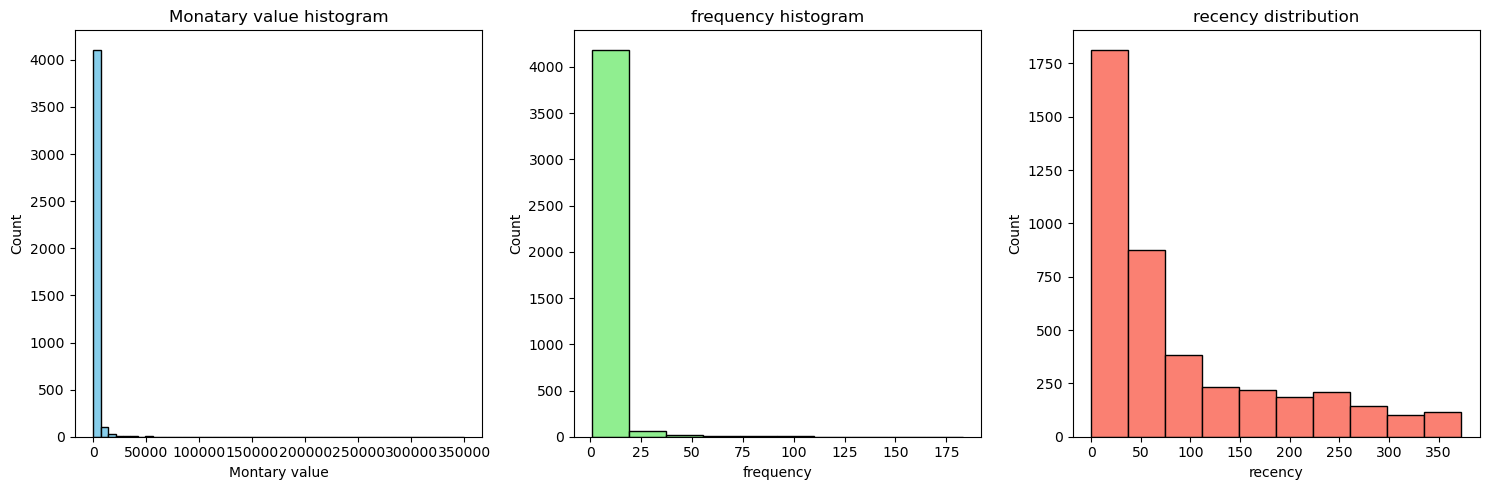

In [33]:
plt.figure(figsize= (15,5))

plt.subplot (1,3,1)
plt.hist(aggrigated_df['MonataryValue'], bins= 50, color='skyblue', edgecolor = 'black')
plt.title ('Monatary value histogram')
plt.xlabel ('Montary value')
plt.ylabel ('Count')


plt.subplot (1,3,2)
plt.hist (aggrigated_df['Frequency'], bins= 10, color= 'lightgreen', edgecolor = 'black')
plt.title ('frequency histogram')
plt.xlabel ('frequency')
plt.ylabel ('Count')

plt.subplot(1,3,3)
plt.hist(aggrigated_df['Recency'], bins= 10, color= 'salmon', edgecolor = 'black')
plt.title('recency distribution')
plt.xlabel('recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show

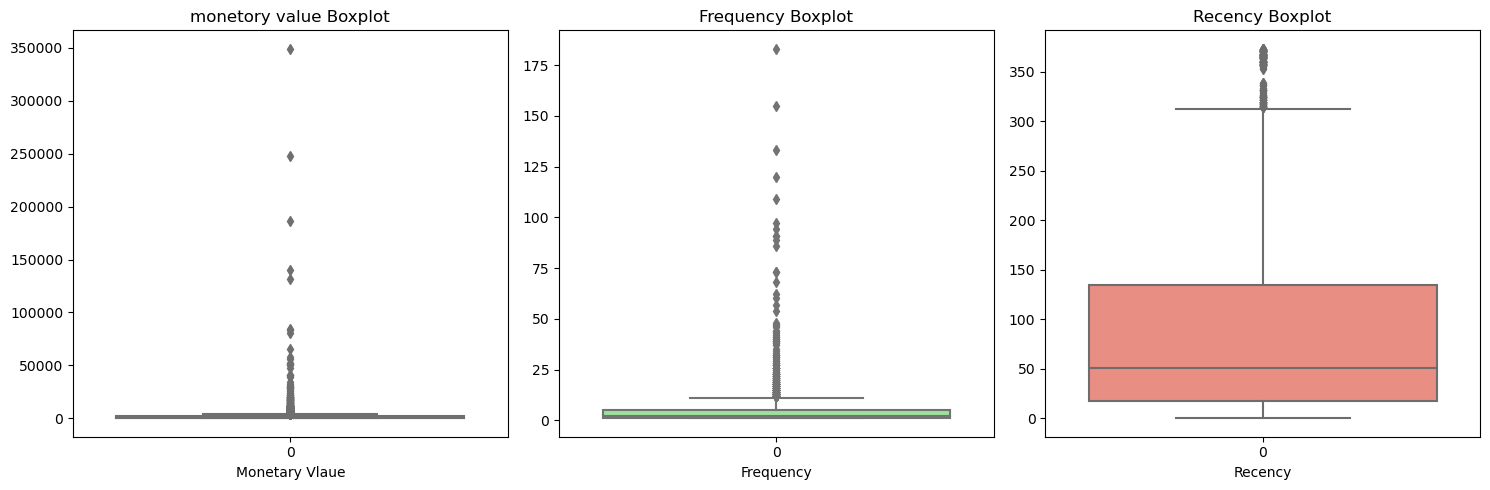

In [34]:
plt.figure(figsize= (15,5))

plt.subplot(1,3,1)
sns.boxplot(aggrigated_df['MonataryValue'], color= 'skyblue')
plt.title('monetory value Boxplot')
plt.xlabel('Monetary Vlaue')

plt.subplot (1,3,2)
sns.boxplot(aggrigated_df['Frequency'], color= 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot (1,3,3)
sns.boxplot (aggrigated_df['Recency'], color= 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [35]:
M_Q1 = aggrigated_df['MonataryValue'].quantile(0.25)
M_Q3 = aggrigated_df['MonataryValue'].quantile(0.75)

M_IQR = M_Q3 - M_Q1

Monatary_Outliers_df = aggrigated_df[(aggrigated_df['MonataryValue']> (M_Q3 + 1.5* M_IQR)) | (aggrigated_df['MonataryValue']< (M_Q1 - 1.5* M_IQR))].copy()

Monatary_Outliers_df.describe()



,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency
count,423.0,423.0,423.0,423,423.0
mean,15103.0,12188.1,17.2,2010-11-09 12:26:02.978723328,30.0
min,12357.0,3802.0,1.0,2009-12-10 18:03:00,0.0
25%,13622.0,4605.9,8.0,2010-11-08 13:17:30,3.0
50%,14961.0,6191.3,12.0,2010-11-26 12:19:00,13.0
75%,16692.0,10273.2,18.0,2010-12-06 10:34:30,31.0
max,18260.0,349164.3,183.0,2010-12-09 19:32:00,364.0
std,1728.7,25830.9,19.7,NaN,51.5


In [36]:
M_Q1 = aggrigated_df['Frequency'].quantile(0.25)
M_Q3 = aggrigated_df['Frequency'].quantile(0.75)

M_IQR = M_Q3 - M_Q1

Frequency_Outliers_df = aggrigated_df[(aggrigated_df['Frequency']> (M_Q3 + 1.5* M_IQR)) | (aggrigated_df['Frequency']< (M_Q1 - 1.5* M_IQR))].copy()

Frequency_Outliers_df.describe()


,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency
count,279.0,279.0,279.0,279,279.0
mean,15352.7,14409.7,23.8,2010-11-23 11:06:20.645161216,16.1
min,12437.0,1094.4,12.0,2010-05-12 16:51:00,0.0
25%,13800.0,4331.6,13.0,2010-11-20 13:14:30,2.0
50%,15465.0,6615.8,17.0,2010-12-02 10:46:00,7.0
75%,16828.5,11692.4,23.0,2010-12-07 11:08:30,19.0
max,18260.0,349164.3,183.0,2010-12-09 19:32:00,211.0
std,1748.4,31381.7,21.9,NaN,26.6


Or can be done using for loop to reduct the redondent steps

In [ ]:
Out_liers_direct = {}  # Dictionary to store outlier DataFrames
columns_to_check = ['MonataryValue', 'Frequency']  # Replace with your column names

for col in columns_to_check:
    # Calculate Q1, Q3, and IQR for the column
    Q1 = aggrigated_df[col].quantile(0.25)
    Q3 = aggrigated_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filter out the outliers
    outlier = aggrigated_df[
        (aggrigated_df[col] > (Q3 + 1.5 * IQR)) |
        (aggrigated_df[col] < (Q1 - 1.5 * IQR))
    ].copy()

    # Store the outlier DataFrame with a dynamic name
    Out_liers_direct[f'{col}_outlier_df'] = outlier

    # Print a message and the description of the outlier DataFrame
    print(f"\nOutliers for {col}:")
    print(outlier.describe())  # Ensure `outlier` is a DataFrame here
    print("\n" + "="*50 + "\n")



Outliers for MonataryValue:
               Customer ID        MonataryValue            Frequency  \
count                423.0                423.0                423.0   
mean               15103.0              12188.1                 17.2   
min                12357.0               3802.0                  1.0   
25%                13622.0               4605.9                  8.0   
50%                14961.0               6191.3                 12.0   
75%                16692.0              10273.2                 18.0   
max                18260.0             349164.3                183.0   
std                 1728.7              25830.9                 19.7   

                     LastInvoiceDate              Recency  
count                            423                423.0  
mean   2010-11-09 12:26:02.978723328                 30.0  
min              2009-12-10 18:03:00                  0.0  
25%              2010-11-08 13:17:30                  3.0  
50%              2010-

In [ ]:

non_outliers_df = aggrigated_df[(~aggrigated_df.index.isin(Monatary_Outliers_df.index))
                                & (~aggrigated_df.index.isin(Frequency_Outliers_df.index)) ]
print(non_outliers_df.describe())

               Customer ID        MonataryValue            Frequency  \
count               3809.0               3809.0               3809.0   
mean               15376.5                885.5                  2.9   
min                12346.0                  1.6                  1.0   
25%                13912.0                279.9                  1.0   
50%                15389.0                588.0                  2.0   
75%                16854.0               1269.0                  4.0   
max                18287.0               3788.2                 11.0   
std                 1693.2                817.7                  2.2   

                     LastInvoiceDate              Recency  
count                           3809               3809.0  
mean   2010-09-03 11:16:46.516146176                 97.1  
min              2009-12-01 10:49:00                  0.0  
25%              2010-07-08 14:48:00                 22.0  
50%              2010-10-12 16:25:00               

In [39]:
non_outliers_df.describe()

,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency
count,3809.0,3809.0,3809.0,3809,3809.0
mean,15376.5,885.5,2.9,2010-09-03 11:16:46.516146176,97.1
min,12346.0,1.6,1.0,2009-12-01 10:49:00,0.0
25%,13912.0,279.9,1.0,2010-07-08 14:48:00,22.0
50%,15389.0,588.0,2.0,2010-10-12 16:25:00,58.0
75%,16854.0,1269.0,4.0,2010-11-17 13:14:00,154.0
max,18287.0,3788.2,11.0,2010-12-09 20:01:00,373.0
std,1693.2,817.7,2.2,NaN,98.1


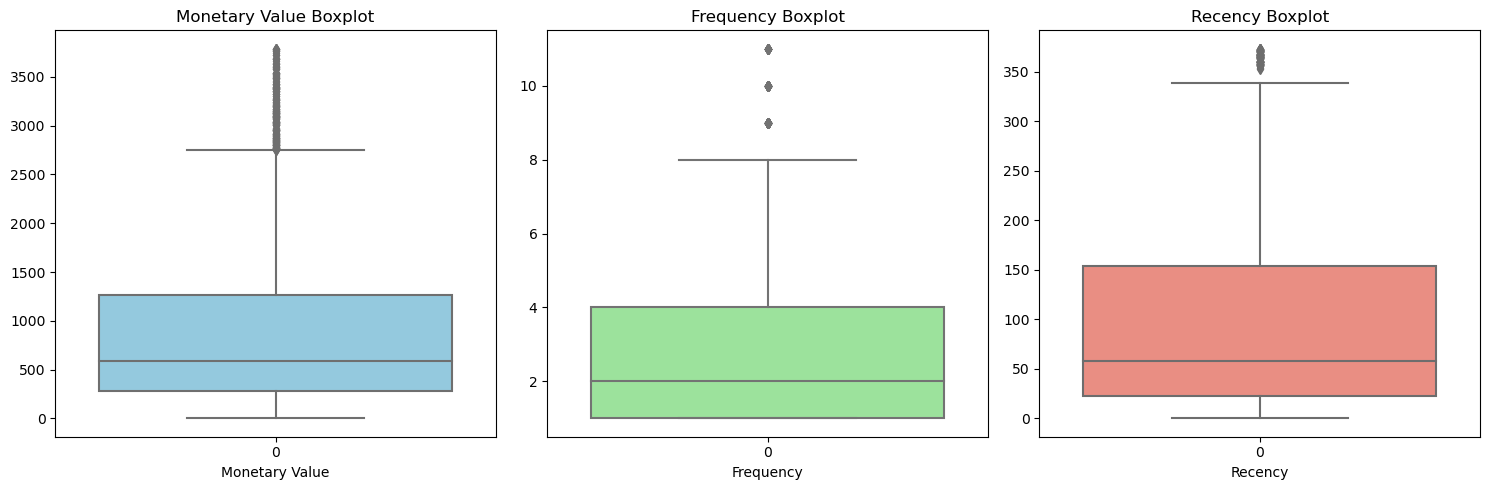

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonataryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

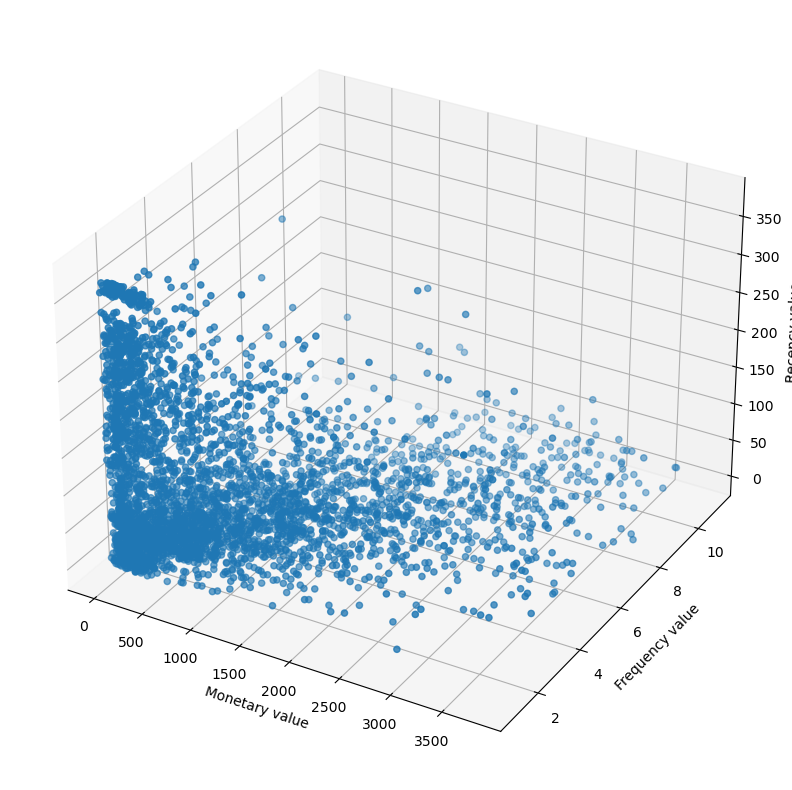

In [41]:
fig = plt.figure(figsize= (10,10))

ax = fig.add_subplot(projection= '3d')


scatter = ax.scatter(non_outliers_df['MonataryValue']
                    , non_outliers_df["Frequency"]
                    , non_outliers_df['Recency'])

ax.set_xlabel ('Monetary value')
ax.set_ylabel ('Frequency value')
ax. set_zlabel('Recency value')

plt.show()

In [ ]:
# All these values are not in the same scales which will effect the clustering algorithm when using kmeans
# Rescaling the data

# Assuning the data is normally distributed enable using the standard scaling
Scaler = StandardScaler()

Scaled_data = Scaler.fit_transform(non_outliers_df[['MonataryValue', 'Frequency', 'Recency']])

Scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [ ]:
Scaled_data_df = pd.DataFrame(Scaled_data, index= non_outliers_df.index,
                            columns= ('MonataryValue', 'Frequency', 'Recency'))

Scaled_data_df.head()

,MonataryValue,Frequency,Recency
0,-0.9,-0.4,0.7
1,0.5,-0.4,-1.0
2,-0.8,-0.8,-0.2
3,1.6,-0.4,-0.6
4,-0.7,-0.8,-0.9


C:\Users\Ali_Elsharkawy\AppData\Local\Temp\ipykernel_16916\2735021005.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_scaled.show()


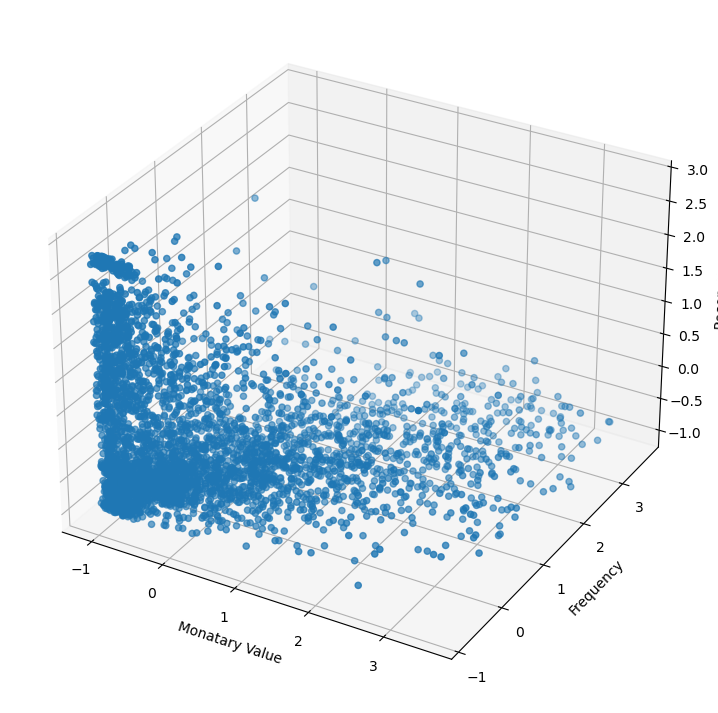

In [44]:
fig_scaled = plt.figure(figsize= (9,9))

ax2 = fig_scaled.add_subplot(projection = '3d')

scatter2 = ax2.scatter(Scaled_data_df['MonataryValue'],
                    Scaled_data_df['Frequency'],
                    Scaled_data_df['Recency'])

ax2.set_xlabel('Monatary Value')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Recency')

fig_scaled.show()
# It is clear that the shap of the scale did not change but the scale changed

# Kmeans method

## How clustering with Kmeans works?

K-Means clustering steps:
 1. Choose k which are number of points (the red dots in the fig.).
 2. Initialize k centroids randomly.
 3. Assign points to nearest centroid.
 4. Update centroids as mean of assigned points (the gray X indicate the shifting in the centriod position).
 5. Repeat until centroids stabilize or max iterations.

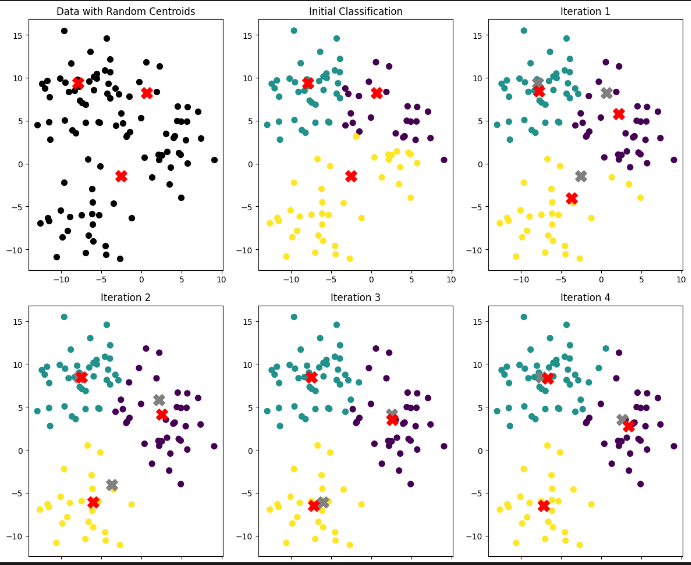

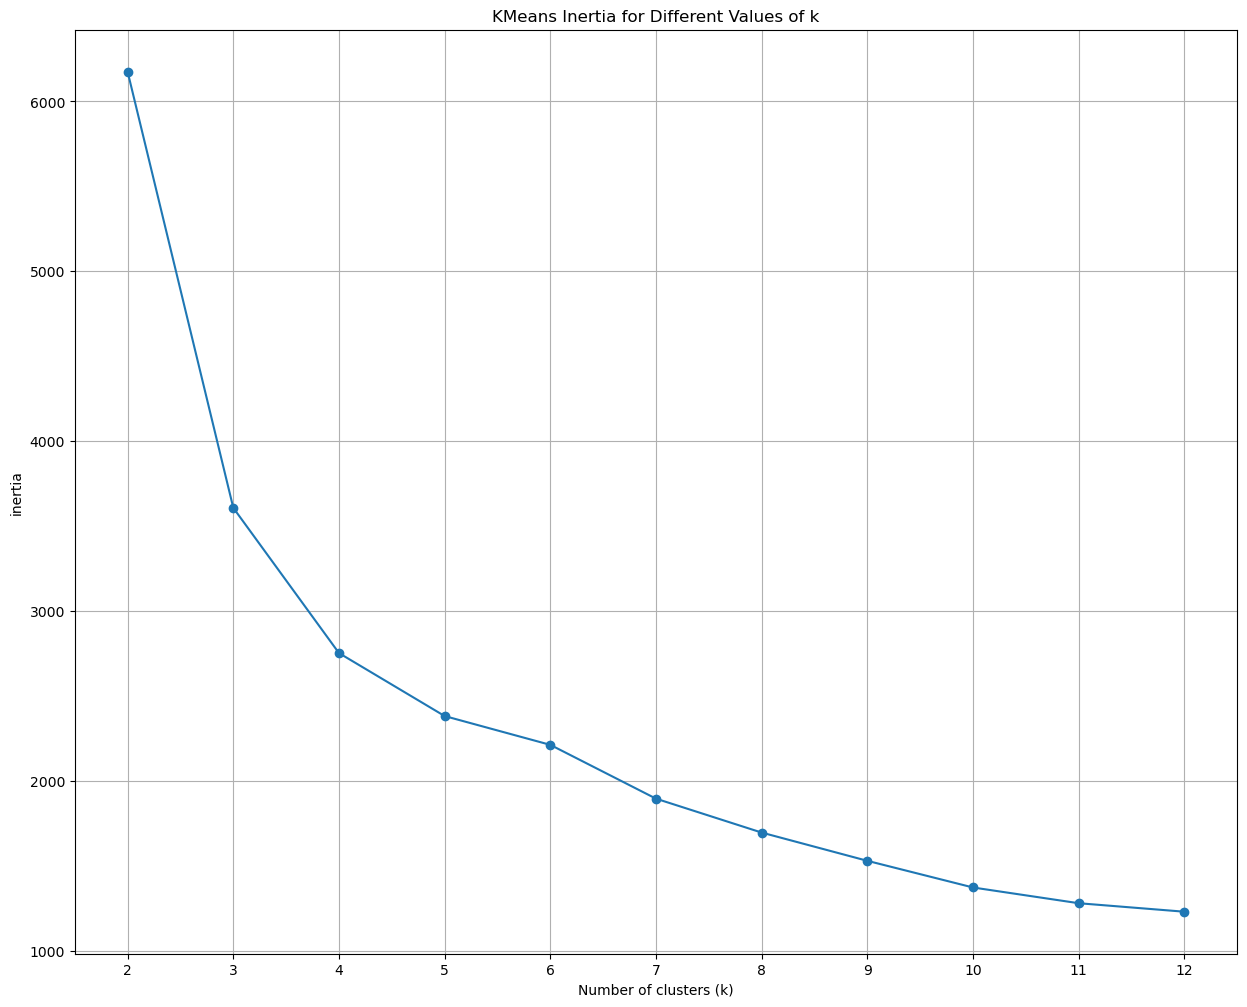

In [ ]:
max_k = 12

inertia = []

K_values = range(2, max_k+1)

for k in K_values:

    kmeans = KMeans(n_clusters= k ,random_state= 42, max_iter= 1000, n_init='auto')

    kmeans.fit_predict(Scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize= (15,12))

plt.plot (K_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(K_values)
plt.grid(True)

plt.show()

# Studying the last figure shows that there is rapid drop untill hitting the cluster number 4 and 5
# Conducting selhouette score analysis to determin which number is the best fit

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

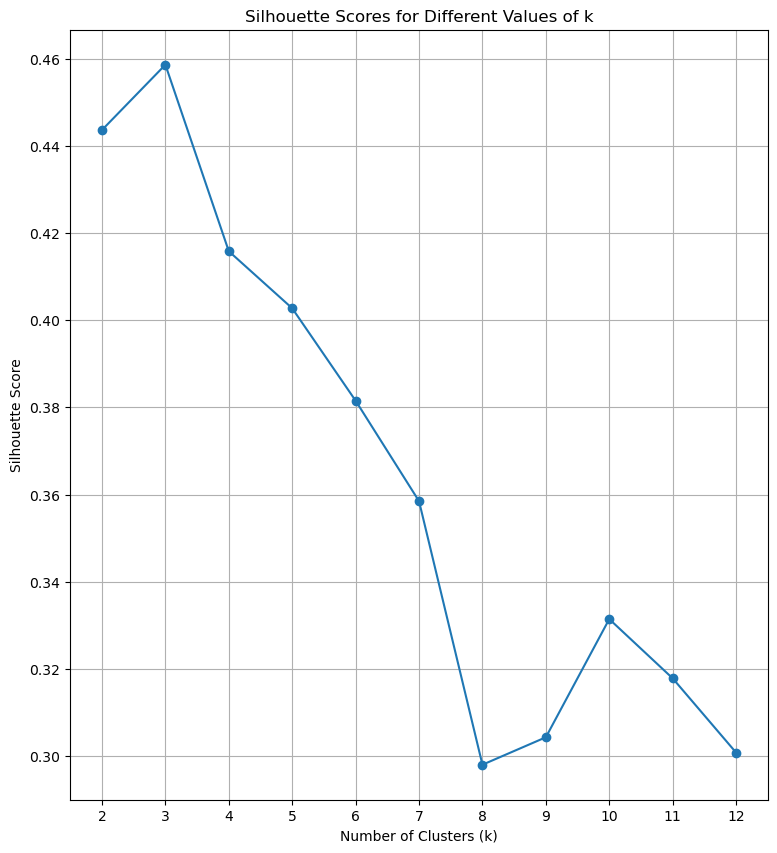

In [ ]:
max_k = 12
sil= []

K_values = range(2,max_k+1)

for k in K_values:
    kmeans = KMeans(n_clusters= k, random_state= 42, max_iter= 1000, n_init= 'auto')

    cluster_labels= kmeans.fit_predict(Scaled_data_df)

    silhouette = silhouette_score(Scaled_data_df, cluster_labels)

    sil.append(silhouette)

plt.figure(figsize= (9,10))
plt.plot(K_values, sil, marker = 'o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K_values)
plt.grid(True)

K number of 4 fives highr silhout score which indicate less overlapping and more distiction in this number of clusters

In [47]:
kmeans = KMeans(n_clusters= 4, random_state= 42, max_iter= 1000, n_init= 'auto')
cluster_labels = kmeans.fit_predict(Scaled_data)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [48]:
non_outliers_df['Cluster'] = cluster_labels

C:\Users\Ali_Elsharkawy\AppData\Local\Temp\ipykernel_16916\2548724979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


In [49]:
non_outliers_df

,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.4,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.3,2,2010-12-07 14:57:00,2,0
2,12348.0,221.2,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.1,2,2010-10-28 08:23:00,42,0
4,12351.0,300.9,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.8,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.7,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.0,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.4,2,2010-08-20 11:57:00,111,0


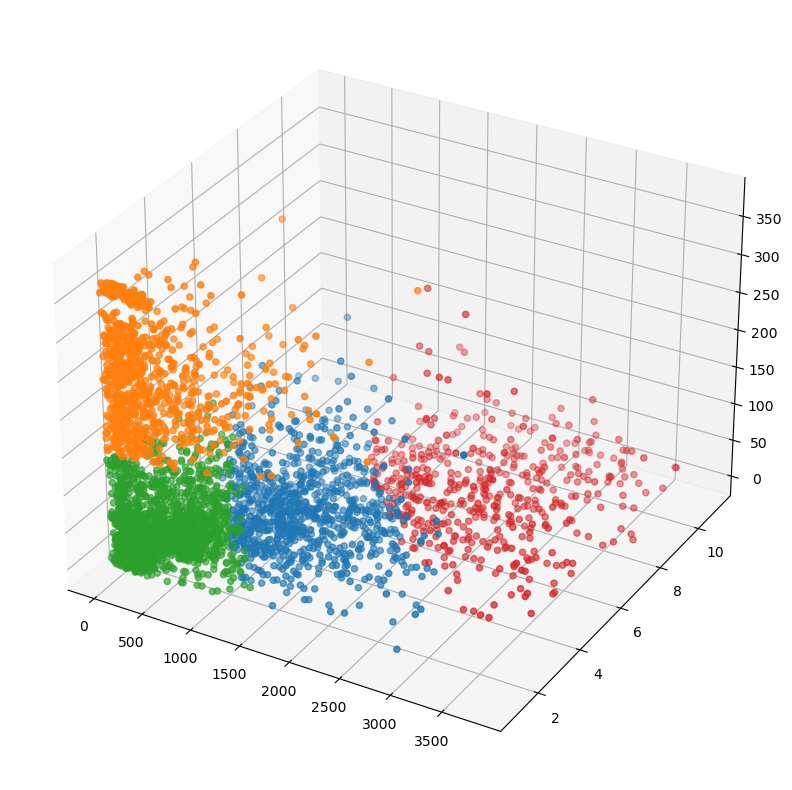

In [51]:
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'  # Red
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(projection= '3d')
scatter = ax.scatter(
    non_outliers_df['MonataryValue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'],
    c = colors,
    marker = 'o'
)

plt.show()

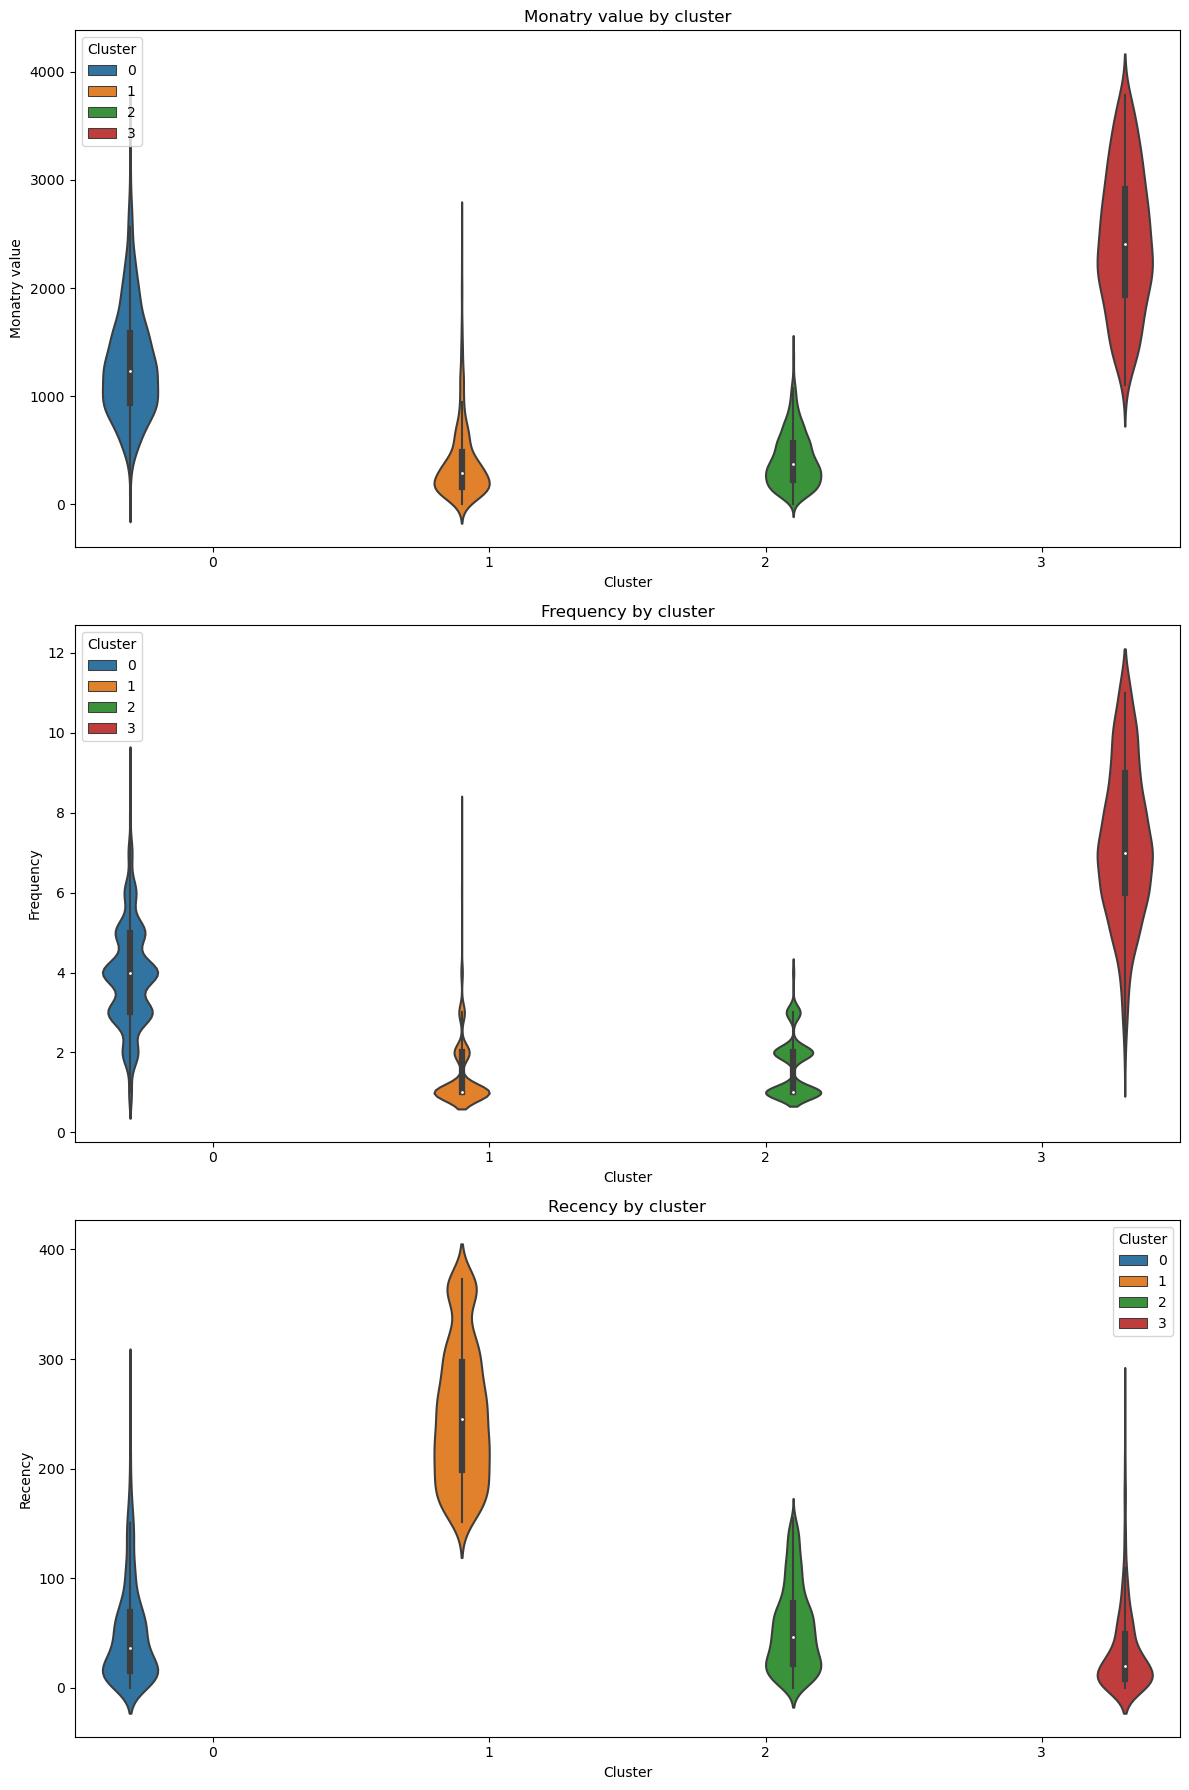

In [67]:
plt.figure(figsize= (12, 18))

plt.subplot(3,1,1)
sns.violinplot(x= non_outliers_df['Cluster'], y= non_outliers_df['MonataryValue'], palette= cluster_colors, hue= non_outliers_df['Cluster'])
plt.title('Monatry value by cluster')
plt.ylabel('Monatry value')

plt.subplot(3,1,2)
sns.violinplot(x= non_outliers_df['Cluster'], y= non_outliers_df['Frequency'], palette= cluster_colors, hue= non_outliers_df['Cluster'])
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x= non_outliers_df['Cluster'], y= non_outliers_df['Recency'], palette= cluster_colors, hue= non_outliers_df['Cluster'])
plt.title('Recency by cluster')
plt.ylabel('Recency')


plt.tight_layout()
plt.show()


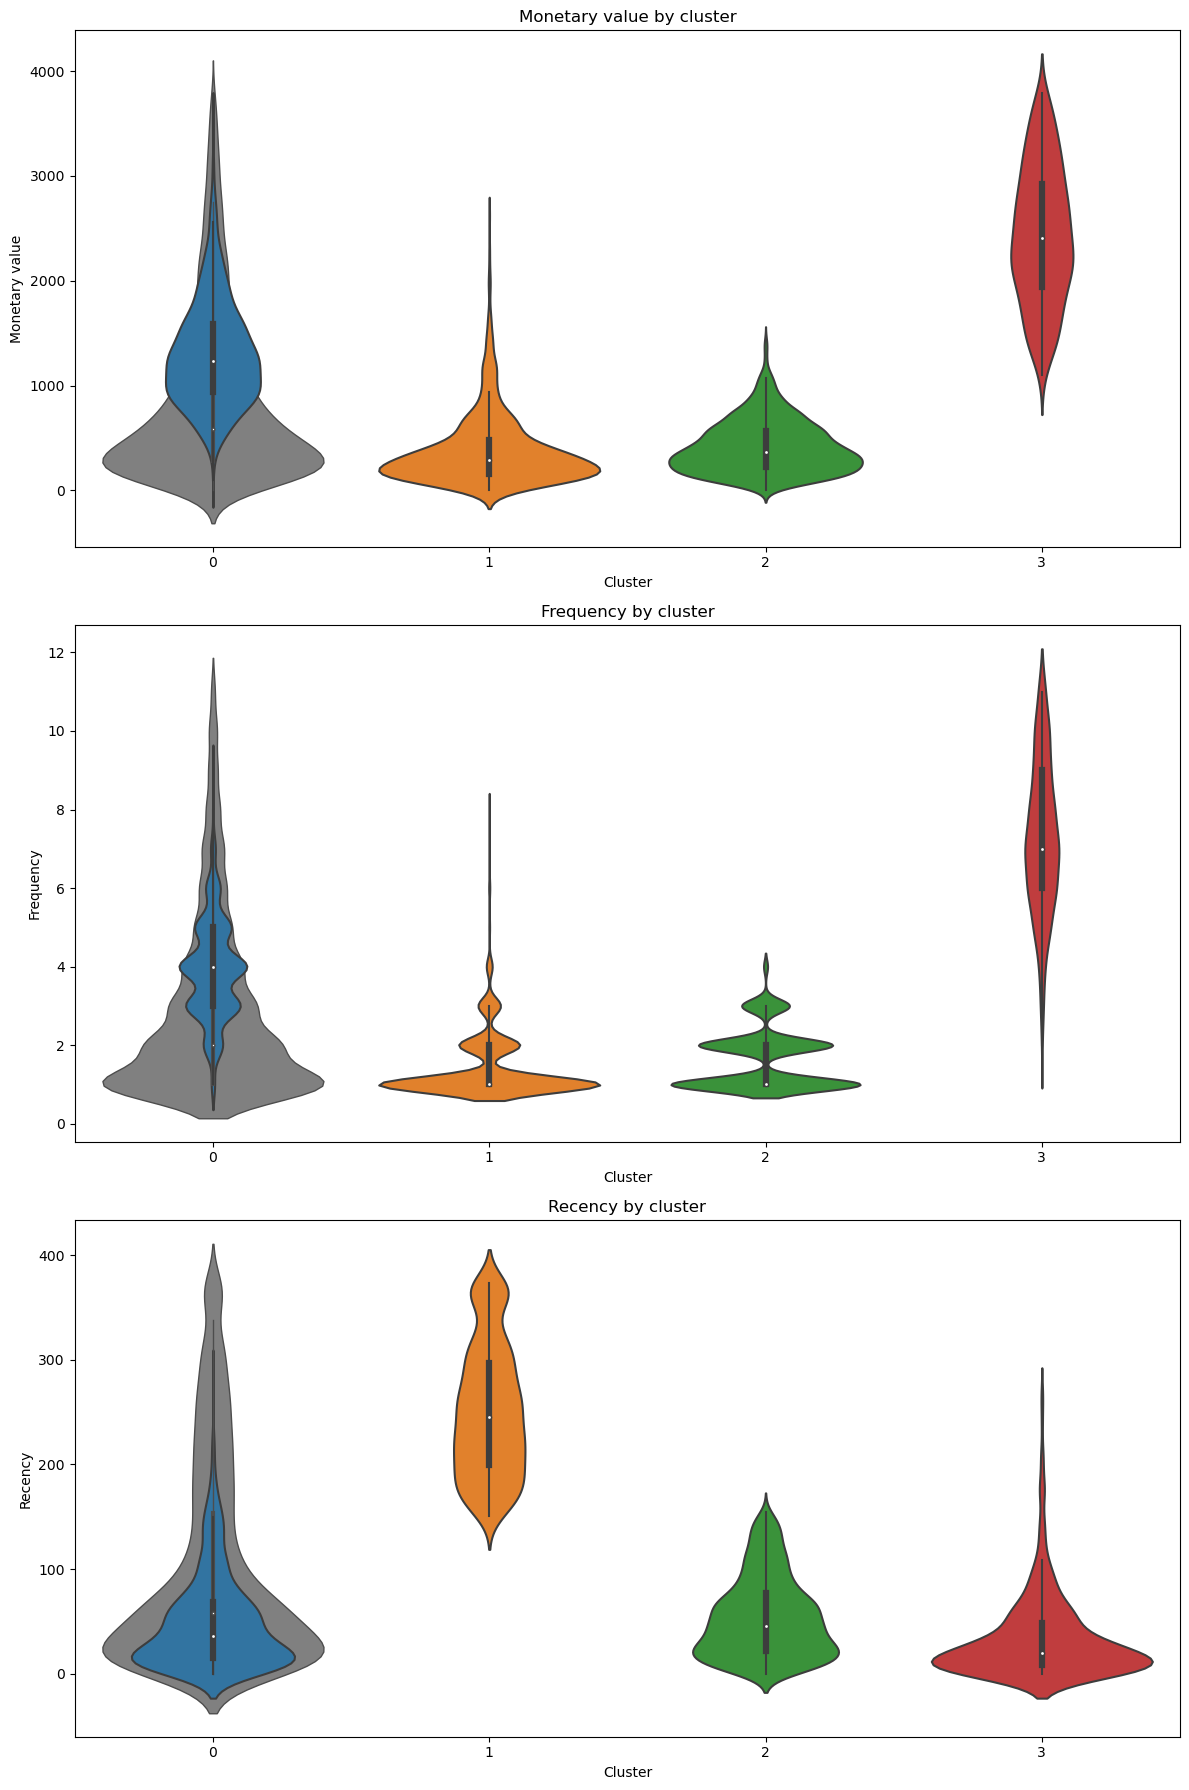

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

# Analysing outlier separately

In [ ]:
overlap_indices = Monatary_Outliers_df.index.intersection(Frequency_Outliers_df.index)

Monetary_only_outliers = Monatary_Outliers_df.drop(overlap_indices)
Frequency_only_outlier = Frequency_Outliers_df.drop(overlap_indices)
Monetary_and_Frequency_outliers = Monatary_Outliers_df.loc[overlap_indices]

# Assigning Clusters manually
Monetary_only_outliers['Cluster'] = -1
Frequency_only_outlier['Cluster'] = -2
Monetary_and_Frequency_outliers['Cluster'] = -3

Outlier_cluster_df = pd.concat([Monetary_only_outliers, Frequency_only_outlier, Monetary_and_Frequency_outliers])

Outlier_cluster_df

,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11230.0,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.8,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.6,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.8,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.5,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.3,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.1,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.8,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.8,23,2010-10-29 14:17:00,41,-3


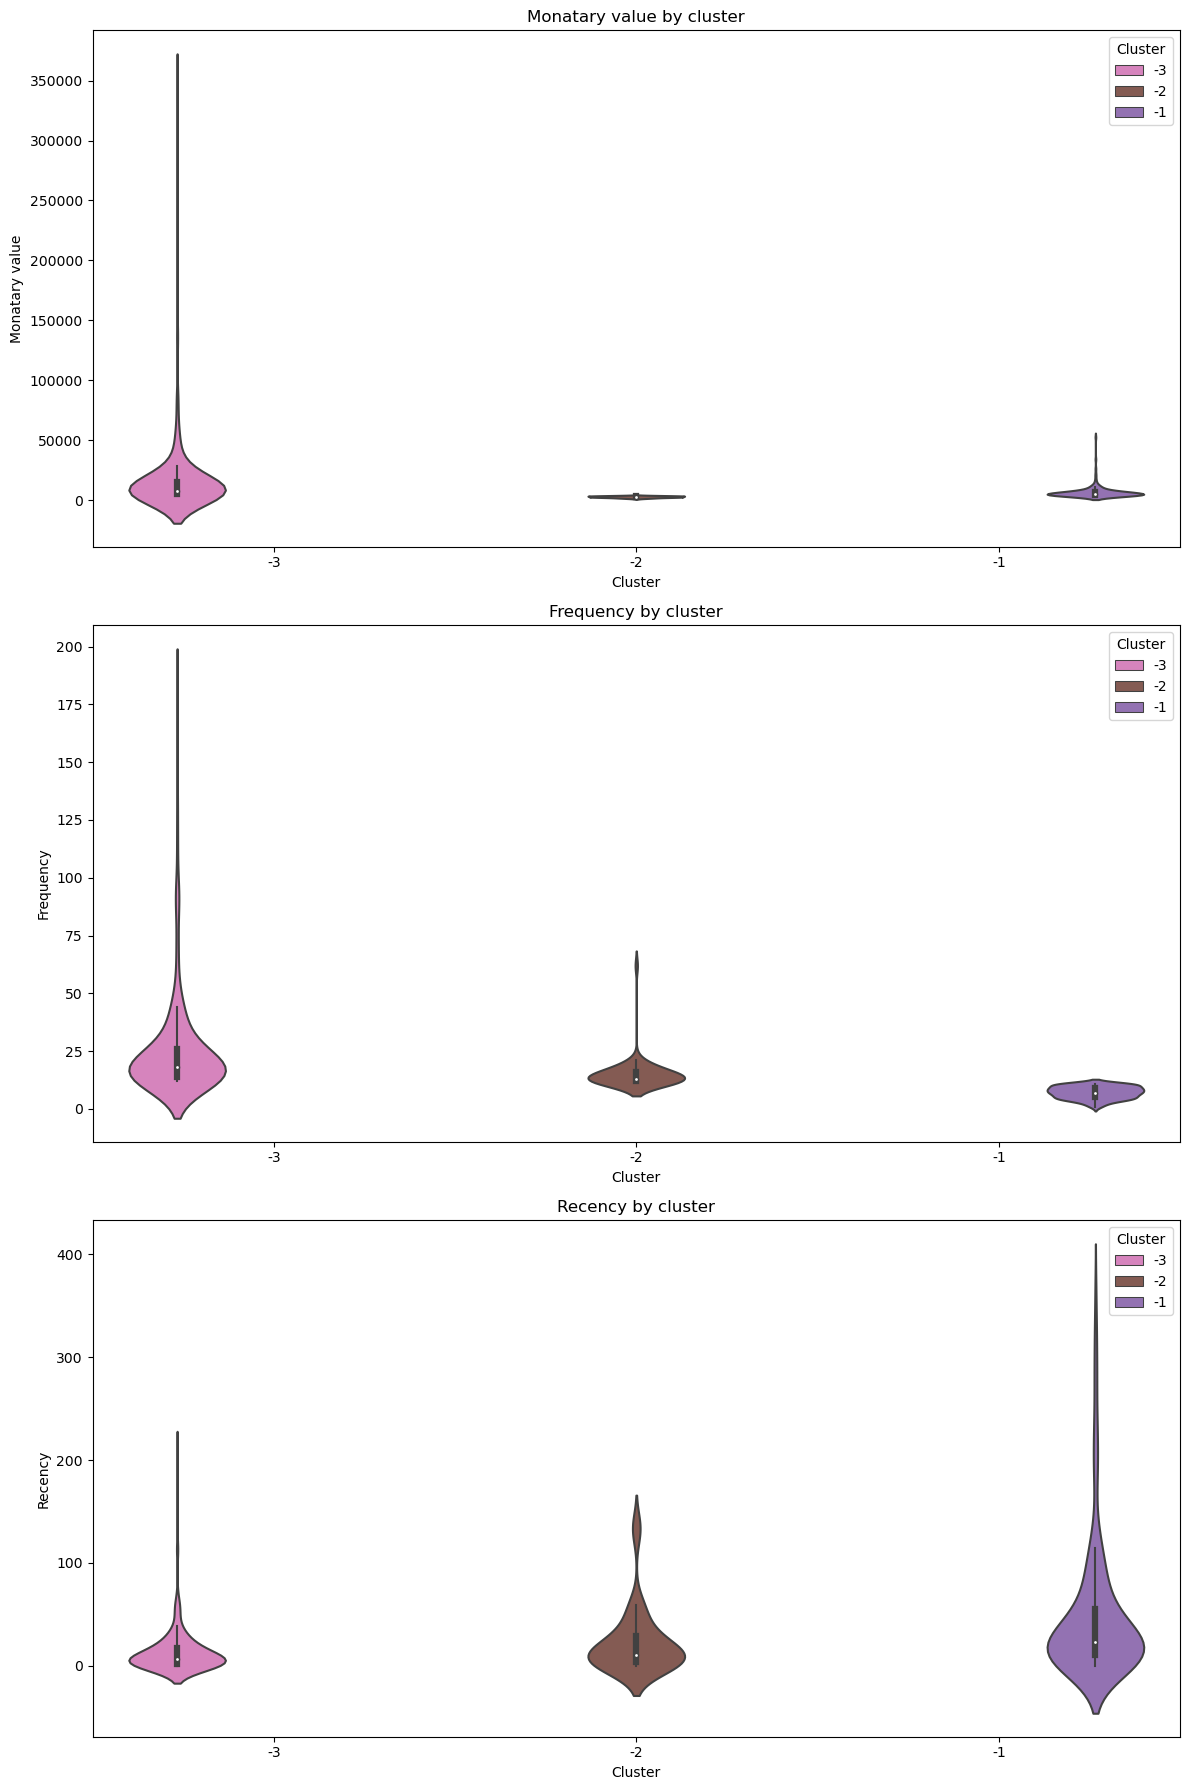

In [70]:
cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

plt.figure(figsize= (12, 18))

plt.subplot (3,1,1)
sns.violinplot(x= Outlier_cluster_df['Cluster'], y= Outlier_cluster_df['MonataryValue'], palette= cluster_colors, hue= Outlier_cluster_df ['Cluster'])
plt.title('Monatary value by cluster')
plt.ylabel('Monatary value')

plt.subplot(3,1,2)
sns.violinplot(x= Outlier_cluster_df['Cluster'], y= Outlier_cluster_df['Frequency'], palette= cluster_colors, hue= Outlier_cluster_df['Cluster'])
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x= Outlier_cluster_df['Cluster'], y= Outlier_cluster_df['Recency'], palette= cluster_colors, hue= Outlier_cluster_df['Cluster'])
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

### Compining all data

In [ ]:
Cluster_labels2 = {
    0: 'RETAIN',
    1: 'RE-ENGAGE',
    2: 'NURTURE',
    3: 'REWARD',
    -1: 'PAMPER',
    -2: 'UPSELL',
    -3: 'DELIGHT'
}

In [71]:
Full_clustering_df = pd.concat([non_outliers_df, Outlier_cluster_df])

Full_clustering_df

,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.4,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.3,2,2010-12-07 14:57:00,2,0
2,12348.0,221.2,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.1,2,2010-10-28 08:23:00,42,0
4,12351.0,300.9,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.3,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.1,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.8,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.8,23,2010-10-29 14:17:00,41,-3


In [79]:
Full_clustering_df['ClusterLabel'] = Full_clustering_df['Cluster'].map(Cluster_labels2)

Full_clustering_df

,Customer ID,MonataryValue,Frequency,LastInvoiceDate,Recency,Cluster,labels,ClusterLabels,ClusterLabel
0,12346.0,169.4,2,2010-06-28 13:53:00,164,1,RE-ENGAGE,RE-ENGAGE,RE-ENGAGE
1,12347.0,1323.3,2,2010-12-07 14:57:00,2,0,RETAIN,RETAIN,RETAIN
2,12348.0,221.2,1,2010-09-27 14:59:00,73,2,NURTURE,NURTURE,NURTURE
3,12349.0,2221.1,2,2010-10-28 08:23:00,42,0,RETAIN,RETAIN,RETAIN
4,12351.0,300.9,1,2010-11-29 15:23:00,10,2,NURTURE,NURTURE,NURTURE
...,...,...,...,...,...,...,...,...,...
4235,18223.0,7516.3,12,2010-11-17 12:20:00,22,-3,DELIGHT,DELIGHT,DELIGHT
4236,18225.0,7545.1,15,2010-12-09 15:46:00,0,-3,DELIGHT,DELIGHT,DELIGHT
4237,18226.0,6650.8,15,2010-11-26 15:51:00,13,-3,DELIGHT,DELIGHT,DELIGHT
4241,18231.0,4791.8,23,2010-10-29 14:17:00,41,-3,DELIGHT,DELIGHT,DELIGHT


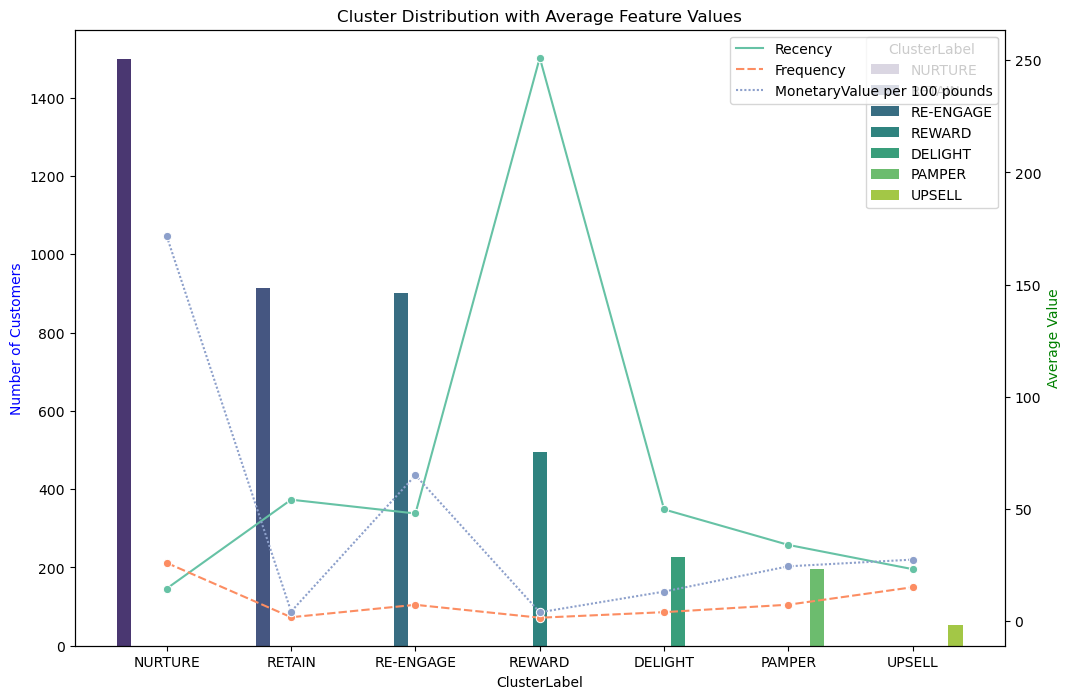

In [88]:
cluster_counts = Full_clustering_df['ClusterLabel'].value_counts()
Full_clustering_df["MonetaryValue per 100 pounds"] = Full_clustering_df["MonataryValue"] / 100.00
feature_means = Full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()